In [1]:
##mobile sales prediction binary model

In [2]:
%pylab inline
import pandas as pd
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import time

Populating the interactive namespace from numpy and matplotlib


In [3]:
train = pd.read_csv('train.csv')

y = train.price_range

y = y.replace({1: 0, 2: 1, 3: 1, 4: 1})

X = train.drop('price_range', axis=1)

divide_seed = np.random.randint(1, 100)

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.3, random_state=divide_seed)

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1400
600
1400
600


In [4]:
#Let's start with a linear regression:
lr = LinearRegression()

lr.fit(X_train, y_train)

prediction_lr = lr.predict(X_train)

print("Test result:", lr.score(X_test, y_test))

print("Train result:", lr.score(X_train, y_train))

Test result: 0.7015020432518382
Train result: 0.7245516909274282


In [5]:
##Now, let's continue with kNN:

list_of_predictions_knn = list()
list_of_test_results_knn = list()
list_of_train_results_knn = list()

for i in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    list_of_predictions_knn.append(knn.predict(X_train))
    list_of_test_results_knn.append(knn.score(X_test, y_test))
    list_of_train_results_knn.append(knn.score(X_train, y_train))
    if i % 20 == 0:
        print("Predicted with ", i, " neighbours")

Predicted with  20  neighbours
Predicted with  40  neighbours
Predicted with  60  neighbours
Predicted with  80  neighbours
Predicted with  100  neighbours


Max test result:  0.935  takes  83  trees


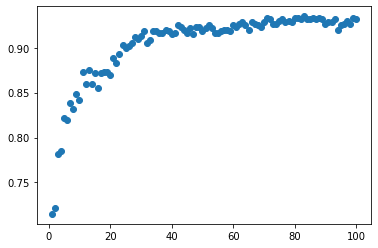

In [6]:

print("Max test result: ", max(list_of_test_results_knn), 
      " takes ", (list_of_test_results_knn.index(max(list_of_test_results_knn))+1), " trees")

plt.scatter(x=list((range(1, 101))), y=list_of_test_results_knn)

Train result: 0.9928571428571429
Accuracy: 0.975
AUC-ROC: 0.9750808414174751
######################################################


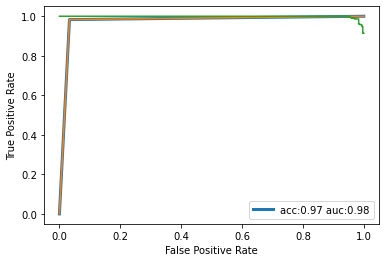

In [7]:
##Next classifier we'll try to use is Logistic Regression:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

prediction = logistic_model.predict(X_test)

#print("Test result:", logistic_model.score(X_test, y_test))

print("Train result:", logistic_model.score(X_train, y_train))

print("Accuracy:", accuracy_score(y_test, prediction))

print("AUC-ROC:", roc_auc_score(y_test, prediction))

print("######################################################")
logistic_model_proba = LogisticRegression()

logistic_model_proba.fit(X_train, y_train)

prediction_proba = logistic_model.predict_proba(X_test)


# Now let's create the ROC-curve and PR-curve to represent our model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
fpr, tpr, _ = roc_curve(y_test, prediction)
acc = logistic_model.score(X_test, y_test)
auc = roc_auc_score(y_test, prediction)
plt.plot(fpr, tpr, label="acc:%.2f auc:%.2f" % (acc, auc), linewidth=3)
plt.legend(loc="best")

precision, recall, thresholds = precision_recall_curve(y_test, prediction_proba[:, 1])

plt.plot(fpr, tpr)

plt.plot(recall, precision)

In [8]:
#Next step we'll take is DecisionTree model:
decision_tree = DecisionTreeClassifier(random_state=divide_seed)

decision_tree.fit(X_train, y_train)

prediction_tree = decision_tree.predict(X_test)

print("Test result (accuracy):", decision_tree.score(X_test, y_test))

print("Accuracy:", accuracy_score(y_test, prediction_tree))

auc_roc_tree = roc_auc_score(y_test, prediction_tree)

print("AUC-ROC:", auc_roc_tree)

print("######################################################")
decision_tree_proba = DecisionTreeClassifier(random_state=divide_seed)

decision_tree_proba.fit(X_train, y_train)

prediction_tree_proba = decision_tree_proba.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, prediction_tree_proba > 0.5))

auc_roc_tree = roc_auc_score(y_test, prediction_tree_proba)

print("AUC-ROC:", auc_roc_tree)

Test result (accuracy): 0.9166666666666666
Accuracy: 0.9166666666666666
AUC-ROC: 0.9170250358369171
######################################################
Accuracy: 0.9166666666666666
AUC-ROC: 0.9170250358369171


In [9]:
#This accuracy is not enough to accept this decision tree model, so, let's use bagging to try to improve it.
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=divide_seed), n_estimators=100)

bagging.fit(X_train, y_train)

prediction_bagging = bagging.predict(X_test)

#print("Test result:", bagging.score(X_test, y_test))

#print("Train result:", bagging.score(X_train, y_train))

#print("Accuracy:", accuracy_score(y_test, prediction_bagging))

auc_roc_tree = roc_auc_score(y_test, prediction_bagging)

print("######################################################")
bagging_proba = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=divide_seed), n_estimators=100)

bagging_proba.fit(X_train, y_train)

prediction_bagging_proba = bagging_proba.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, prediction_bagging_proba > 0.5))

auc_roc_tree = roc_auc_score(y_test, prediction_bagging_proba)

print("AUC-ROC:", auc_roc_tree)

######################################################
Accuracy: 0.9516666666666667
AUC-ROC: 0.9889044460001556


In [10]:
##As we can see, it worked, AUC-ROC metric gives us now 99,4%.

##But let's continue and bootstrap our sample:

In [11]:
new_predicted_tree = 0
new_predicted_tree_proba = np.zeros(X_test.shape[0])


for k in range(0, 100):
    i_new = np.random.randint(0, X_train.shape[0], int(2000*0.7))
    tree_class = DecisionTreeClassifier()
    
    tree_class.fit(X_train[i_new], array(y_train)[i_new])
    
    new_predicted_tree_proba += tree_class.predict_proba(X_test)[:, 1]
    
    new_predicted_tree += tree_class.predict(X_test)
    new_predicted_tree = np.divide(new_predicted_tree, 100).astype('int8')
    
new_predicted_tree_proba = new_predicted_tree_proba / 100
    

print("Accuracy:", accuracy_score(y_test, new_predicted_tree_proba > 0.5))
print("ROC-AUC:", roc_auc_score(y_test, new_predicted_tree_proba))

Accuracy: 0.9533333333333334
ROC-AUC: 0.9872653932059872


In [12]:
##Comparable, but still bit worse than Bagging

##Let's try RandomForestClassifier with different number of trees:

In [13]:
test_forest_results = list()
train_forest_results = list()
accuracy_forest_results = list()
auc_roc_forest_results = list()
time_list = list()

accuracy_forest_results_proba = list()
auc_roc_forest_results_proba = list()

start = time.time()
cur_time = start

for j in range(10, 1010, 10):
    
    decision_forest = RandomForestClassifier(random_state=divide_seed, n_estimators=j)
    decision_forest_proba = RandomForestClassifier(random_state=divide_seed, n_estimators=j)

    decision_forest.fit(X_train, y_train)
    
    decision_forest_proba.fit(X_train, y_train)

    prediction_forest = decision_forest.predict(X_test)
    
    prediction_forest_pr = decision_forest_proba.predict_proba(X_test)[:, 1]

    test_forest_results.append(decision_forest.score(X_test, y_test))

    train_forest_results.append(decision_forest.score(X_train, y_train))

    accuracy_forest_results.append(accuracy_score(y_test, prediction_forest))
    
    accuracy_forest_results_proba.append(accuracy_score(y_test, prediction_forest_pr > 0.5))

    auc_roc_forest = roc_auc_score(y_test, prediction_forest)

    auc_roc_forest_results.append(auc_roc_forest)
    auc_roc_forest_results_proba.append(roc_auc_score(y_test, prediction_forest_pr))
    if j % 50 == 0:
        cur_time = time.time() - cur_time
        if j % 100 != 0:
            time_list.append(cur_time)
            print('Number of trees:', j)
            print("Prediction completed by", j/10, "%")
            print("Took ", cur_time, " seconds")
            print("--------------------")
print("Prediction completed by 100%")
finish = time.time() - start

print("Prediction took ", finish, " seconds")

Number of trees: 50
Prediction completed by 5.0 %
Took  0.9979665279388428  seconds
--------------------
Number of trees: 150
Prediction completed by 15.0 %
Took  4.719435691833496  seconds
--------------------
Number of trees: 250
Prediction completed by 25.0 %
Took  10.636664867401123  seconds
--------------------
Number of trees: 350
Prediction completed by 35.0 %
Took  19.622387170791626  seconds
--------------------
Number of trees: 450
Prediction completed by 45.0 %
Took  32.34672403335571  seconds
--------------------
Number of trees: 550
Prediction completed by 55.0 %
Took  46.11509156227112  seconds
--------------------
Number of trees: 650
Prediction completed by 65.0 %
Took  62.674309730529785  seconds
--------------------
Number of trees: 750
Prediction completed by 75.0 %
Took  82.5909481048584  seconds
--------------------
Number of trees: 850
Prediction completed by 85.0 %
Took  105.43815398216248  seconds
--------------------
Number of trees: 950
Prediction completed by

Max test result:  0.9466666666666667  takes  40  trees
Max accuracy result:  0.9466666666666667  takes  40  trees
Max auc-roc result:  0.9466613327999467  takes  40  trees
Max accuracy result with proba:  0.9466666666666667  takes  40  trees
Max auc-roc result with proba:  0.9905935037948238  takes  40  trees


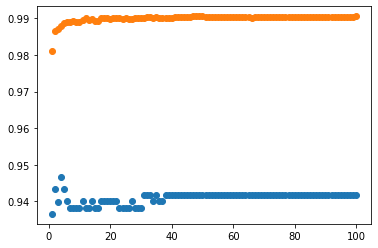

Time taken via number of trees:


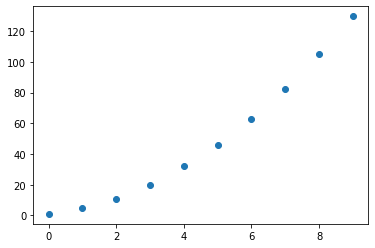

In [14]:
print("Max test result: ", max(test_forest_results), " takes ", (test_forest_results.index(max(test_forest_results))+1)*10, " trees")

print("Max accuracy result: ", max(accuracy_forest_results), " takes ", (accuracy_forest_results.index(max(accuracy_forest_results))+1)*10, " trees")

print("Max auc-roc result: ", max(auc_roc_forest_results), " takes ", (auc_roc_forest_results.index(max(auc_roc_forest_results))+1)*10, " trees")

print("Max accuracy result with proba: ", max(accuracy_forest_results_proba), " takes ", (accuracy_forest_results.index(max(accuracy_forest_results))+1)*10, " trees")

print("Max auc-roc result with proba: ", max(auc_roc_forest_results_proba), " takes ", (auc_roc_forest_results.index(max(auc_roc_forest_results))+1)*10, " trees")


plt.scatter(x=list((range(1, 101))), y=auc_roc_forest_results)

plt.scatter(x=list((range(1, 101))), y=auc_roc_forest_results_proba)
plt.show()

print("Time taken via number of trees:")
plt.scatter(x=list(range(0, 10)), y=time_list)
plt.show()

In [15]:
##Finally, let's take a look at which features were most important in our model:

[0.05759035 0.00359065 0.01766482 0.00359743 0.01482185 0.0034375
 0.02168668 0.01480248 0.02392138 0.01405688 0.01775067 0.0384614
 0.03787113 0.66936242 0.01538006 0.0177393  0.01779789 0.00272251
 0.00426389 0.0034807 ]


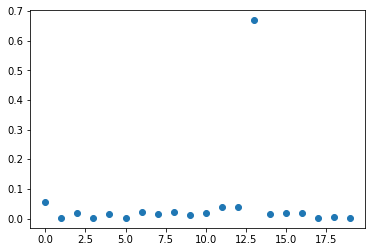

In [16]:
importances = list(decision_forest.feature_importances_)

number = list(range(0, 20, 1))

print(decision_forest.feature_importances_)

plt.scatter(x=number, y=importances)